# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import numpy

In [1]:
import gensim.downloader as api

In [2]:
import gensim.downloader as api

# Google Newsの学習済み単語ベクトルをダウンロード・ロード
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
vector1 = wv['United_States']
vector1

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [6]:
similarity = wv.similarity('United_States', 'U.S.')
similarity

0.73107743

## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [7]:
similar_words = wv.most_similar('United_States', topn=10)
similar_words

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [8]:
result = wv.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)
result

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [9]:
!wget http://download.tensorflow.org/data/questions-words.txt

--2025-05-09 05:43:00--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.101.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.006s  

2025-05-09 05:43:00 (97.6 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [34]:
def keisan(word1, word2, word3,word4, model):
  predicted_word = model.most_similar(positive=[word2, word3], negative=[word1], topn=1)
  result = (predicted_word, word4)
  return result

In [37]:
with open('/content/questions-words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

results = []
in_section = False
section_name = ': capital-common-countries'

for line in lines:
    line = line.strip()

    if line.startswith(':'):
        if line == section_name:
            in_section = True  # 処理を開始
            continue
        elif in_section:
            break  # 処理していたセクションが終わったら終了
        else:
            continue  # まだ対象セクションに入ってないなら無視

    if in_section:
        parts = line.split()
        if len(parts) != 4:
            continue
        word1, word2, word3, word4 = parts
        result = keisan(word1, word2, word3, word4, wv)
        results.append(result)

results

[([('Iraqi', 0.635187029838562)], 'Iraq'),
 ([('Thailand', 0.7137669324874878)], 'Thailand'),
 ([('China', 0.7235778570175171)], 'China'),
 ([('Germany', 0.6734622716903687)], 'Germany'),
 ([('Switzerland', 0.4919748306274414)], 'Switzerland'),
 ([('Egypt', 0.7527808547019958)], 'Egypt'),
 ([('Australia', 0.583732545375824)], 'Australia'),
 ([('Viet_Nam', 0.6276341676712036)], 'Vietnam'),
 ([('Cuba', 0.6460990905761719)], 'Cuba'),
 ([('Finland', 0.68999844789505)], 'Finland'),
 ([('Pakistan', 0.7233326435089111)], 'Pakistan'),
 ([('Afghan', 0.6160916090011597)], 'Afghanistan'),
 ([('Britain', 0.5646188259124756)], 'England'),
 ([('Spain', 0.703661322593689)], 'Spain'),
 ([('Russia', 0.7382973432540894)], 'Russia'),
 ([('Norway', 0.6470744013786316)], 'Norway'),
 ([('Canada', 0.5912168622016907)], 'Canada'),
 ([('France', 0.6724624633789062)], 'France'),
 ([('Italy', 0.6826190948486328)], 'Italy'),
 ([('Sweden', 0.6757243871688843)], 'Sweden'),
 ([('Iran', 0.7671369910240173)], 'Iran'),

## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [38]:
correct = 0
total = 0

for prediction, answer in results:
    if len(prediction) == 0:
        continue  # 空リストは無視

    predicted_word = prediction[0][0]  # 一番スコアが高い単語
    if predicted_word.lower() == answer.lower():
        correct += 1
    total += 1

accuracy = correct / total if total > 0 else 0
print(f'正解数: {correct} / {total} ({accuracy:.2%})')


正解数: 421 / 506 (83.20%)


In [39]:
with open('/content/questions-words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

results = []
in_section = False
section_name = ': gram1-adjective-to-adverb'

for line in lines:
    line = line.strip()

    if line.startswith(':'):
        if line == section_name:
            in_section = True  # 処理を開始
            continue
        elif in_section:
            break  # 処理していたセクションが終わったら終了
        else:
            continue  # まだ対象セクションに入ってないなら無視

    if in_section:
        parts = line.split()
        if len(parts) != 4:
            continue
        word1, word2, word3, word4 = parts
        result = keisan(word1, word2, word3, word4, wv)
        results.append(result)

results

[([('apparently', 0.48172980546951294)], 'apparently'),
 ([('Calm', 0.5576374530792236)], 'calmly'),
 ([('irrepressibly', 0.5931417346000671)], 'cheerfully'),
 ([('completing', 0.4639025330543518)], 'completely'),
 ([('market_hypothesis_EMH', 0.5452137589454651)], 'efficiently'),
 ([('fortunately', 0.538730263710022)], 'fortunately'),
 ([('Free', 0.44715797901153564)], 'freely'),
 ([('predictably', 0.5140256881713867)], 'furiously'),
 ([('very', 0.5504999160766602)], 'happily'),
 ([('Meteorologist_Julie_Adolphson', 0.42965203523635864)], 'immediately'),
 ([('generally', 0.5263050198554993)], 'infrequently'),
 ([('Still_LaCock_considered', 0.5045531988143921)], 'luckily'),
 ([('highly', 0.6025292873382568)], 'mostly'),
 ([('eminently', 0.5309141874313354)], 'obviously'),
 ([('occasionally', 0.6197056174278259)], 'occasionally'),
 ([('reasonably', 0.48206886649131775)], 'possibly'),
 ([('remarkably', 0.4981955587863922)], 'precisely'),
 ([('profes_sional', 0.49824193120002747)], 'profess

In [40]:
#文法的アナロジー
correct = 0
total = 0

for prediction, answer in results:
    if len(prediction) == 0:
        continue  # 空リストは無視

    predicted_word = prediction[0][0]  # 一番スコアが高い単語
    if predicted_word.lower() == answer.lower():
        correct += 1
    total += 1

accuracy = correct / total if total > 0 else 0
print(f'正解数: {correct} / {total} ({accuracy:.2%})')

正解数: 283 / 992 (28.53%)


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [46]:
import pandas as pd
from scipy.stats import spearmanr

# データ読み込み
df = pd.read_csv('/content/explicitsim353.csv')

model_similarities = []
human_scores = []

for i, row in df.iterrows():
    w1, w2, score = row['cs_word_1'], row['cs_word_2'], row['average']
    try:
        sim = wv.similarity(w1.lower(), w2.lower())
        model_similarities.append(sim)
        human_scores.append(score)
    except KeyError:
        # 片方でも語彙に無ければスキップ
        continue

# スピアマン相関の計算
rho, _ = spearmanr(human_scores, model_similarities)
print(f"スピアマン相関係数: {rho:.4f}")
spearmanr(human_scores, model_similarities)

スピアマン相関係数: 0.7279


SignificanceResult(statistic=0.7279295040288806, pvalue=5.392058496924585e-59)

## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [51]:
with open('/content/questions-words.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()

country_set = set()  # 重複を避けるために set を使用
in_section = False
section_name = ': capital-common-countries'

for line in lines:
    line = line.strip()

    if line.startswith(':'):
        if line == section_name:
            in_section = True
            continue
        elif in_section:
            break
        else:
            continue

    if in_section:
        parts = line.split()
        if len(parts) != 4:
            continue
        _, country1, _, country2 = parts  # word2, word4 が国名
        country_set.add(country1)
        country_set.add(country2)

country_list = list(country_set)
country_list.sort()

country_list


['Afghanistan',
 'Australia',
 'Canada',
 'China',
 'Cuba',
 'Egypt',
 'England',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iran',
 'Iraq',
 'Italy',
 'Japan',
 'Norway',
 'Pakistan',
 'Russia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Vietnam']

In [52]:
from sklearn.cluster import KMeans
import numpy as np


# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# K-meansクラスタリングを実行（クラスタ数 k=5）
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(country_vectors)

# 結果を表示
labels = kmeans.labels_

# 各クラスタに所属する国を表示
clusters = {i: [] for i in range(5)}
for idx, label in enumerate(labels):
    clusters[label].append(country_list[idx])

# クラスタごとの国名を表示
for cluster, countries in clusters.items():
    print(f"Cluster {cluster}: {countries}")


Cluster 0: ['Canada', 'England', 'France', 'Germany', 'Greece', 'Italy', 'Spain']
Cluster 1: ['Thailand', 'Vietnam']
Cluster 2: ['Australia', 'China', 'Cuba', 'Egypt', 'Iran', 'Japan', 'Russia']
Cluster 3: ['Finland', 'Norway', 'Sweden', 'Switzerland']
Cluster 4: ['Afghanistan', 'Iraq', 'Pakistan']


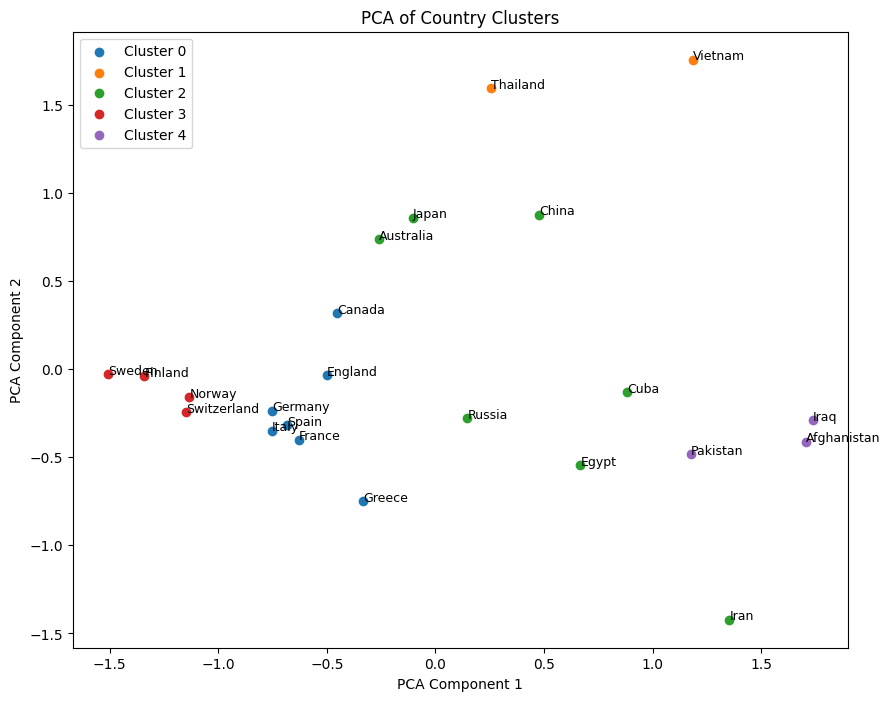

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# PCAで次元を削減（2次元に）
pca = PCA(n_components=2)
country_vectors_2d = pca.fit_transform(country_vectors)

# K-meansクラスタリング（クラスタ数 k=5）
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(country_vectors)

# 結果を表示
labels = kmeans.labels_

# クラスタごとに色をつけてプロット
plt.figure(figsize=(10, 8))

# 各クラスタを異なる色で表示
for cluster in range(5):
    cluster_points = country_vectors_2d[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster}")

# 国名ラベルを表示（オプション）
for i, country in enumerate(country_list):
    plt.text(country_vectors_2d[i, 0], country_vectors_2d[i, 1], country, fontsize=9)

# グラフのタイトルとラベル
plt.title('PCA of Country Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# クラスタの凡例
plt.legend()

# プロットを表示
plt.show()


## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

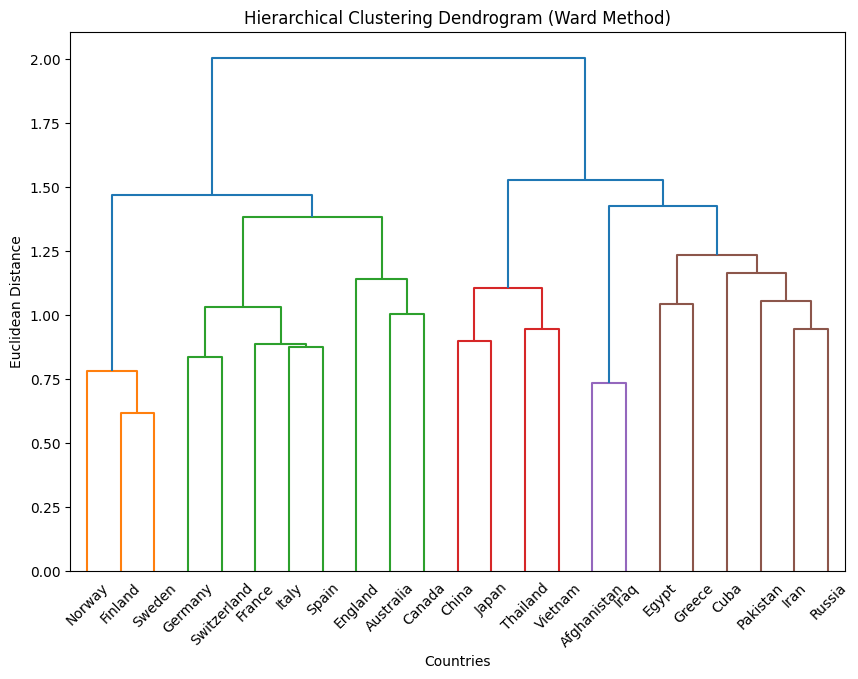

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# ベクトルを正規化（任意）
country_vectors_normalized = normalize(country_vectors)

# Ward法による階層型クラスタリング
linked = linkage(country_vectors_normalized, method='ward')

# デンドログラムをプロット
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=country_list, orientation='top', distance_sort='ascending', show_leaf_counts=True)

# タイトルとラベル
plt.title('Hierarchical Clustering Dendrogram (Ward Method)')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distance')

# プロットを表示
plt.show()


## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

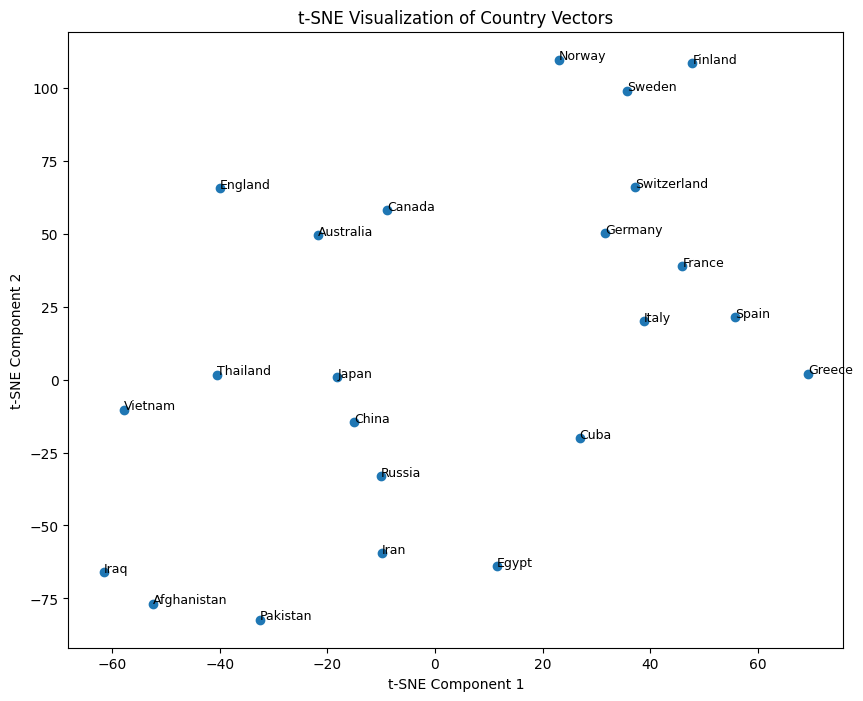

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# 国名リストからベクトルを取得
country_vectors = []
for country in country_list:
    if country in wv:  # モデルに単語が含まれている場合のみ
        country_vectors.append(wv[country])
    else:
        # モデルに国名がない場合は、適当な処理（例えば、ゼロベクトルにするなど）を追加
        country_vectors.append(np.zeros(wv.vector_size))

# numpy配列に変換
country_vectors = np.array(country_vectors)

# t-SNEによる次元削減（2次元に圧縮）
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
country_vectors_2d = tsne.fit_transform(country_vectors)

# 可視化
plt.figure(figsize=(10, 8))
plt.scatter(country_vectors_2d[:, 0], country_vectors_2d[:, 1])

# 各点に国名をラベルとして表示
for i, country in enumerate(country_list):
    plt.text(country_vectors_2d[i, 0], country_vectors_2d[i, 1], country, fontsize=9)

# タイトルと軸ラベル
plt.title('t-SNE Visualization of Country Vectors')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# プロットを表示
plt.show()
